In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
# Load the data:
data = pd.read_csv('train.txt', delim_whitespace=True, header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,49.647550,33.575370,12.120255,55.525019,59.667424,48.655833,27.841291,37.671693,29.372885,61.603557,...,49.545031,26.799100,37.478234,22.991726,40.375436,54.282751,55.377480,36.010305,39.601682,1.0
1,32.186724,49.303083,26.144157,50.185549,35.250637,50.152353,28.309090,49.861035,29.419526,54.928607,...,47.364147,37.204230,33.141586,43.289154,47.930928,56.223338,51.794596,37.535402,29.442770,0.0
2,50.527849,40.494637,38.048920,46.160760,42.192538,29.879857,51.837174,50.484946,33.463057,39.968752,...,43.277509,34.451938,41.501669,37.546376,67.145373,40.587152,35.052946,46.928596,68.199559,0.0
3,20.317886,50.551271,43.325413,46.714819,46.070661,25.204793,56.131786,39.509030,42.694093,43.844120,...,41.084533,36.651456,77.064527,23.138650,43.166518,27.196714,35.357738,52.509325,39.480603,0.0
4,42.786827,46.552778,29.977697,43.952371,78.084230,57.121656,28.070137,44.151037,96.274285,32.826287,...,24.354419,40.104489,33.004923,28.733771,33.756176,62.872634,38.268475,56.336674,37.689786,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,45.144444,23.455054,59.165270,58.870748,37.828947,46.197904,31.220951,19.750510,34.310324,47.530716,...,37.013224,25.148334,33.044309,46.174713,43.923713,57.344054,50.505656,41.796220,45.711453,0.0
1662,25.764977,54.358390,33.241198,44.707271,41.085282,42.685399,50.958397,61.667418,27.143179,29.851433,...,48.925340,55.391046,33.237688,37.509467,45.216049,41.964317,30.617238,71.009537,61.781565,1.0
1663,46.225286,57.852474,20.160533,59.192148,27.798815,30.228503,48.254692,22.312661,24.440230,38.240191,...,26.969233,49.766653,43.769517,36.359110,31.269858,33.721603,39.474587,56.860678,42.044680,1.0
1664,67.260014,26.574990,33.019673,38.552314,31.122328,39.369573,26.062286,66.022281,26.871273,37.860716,...,55.396821,40.311469,42.639655,49.648895,45.313200,37.665594,39.547350,21.285083,37.558859,0.0


In [4]:
# Describe it 
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,...,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,41.789146,42.325431,41.438719,41.595017,42.218898,41.890934,42.462021,42.309844,39.030340,42.117886,...,42.115709,41.985450,42.215874,42.325745,41.993733,41.810917,42.295220,41.842071,42.456321,0.246098
std,13.107376,13.316249,12.754379,13.015599,12.735725,12.835232,12.852033,13.051811,25.997514,12.888691,...,12.943889,12.685114,12.830829,12.859235,12.772191,12.853493,12.688147,12.715008,13.041834,0.430866
min,7.720632,8.447803,8.030881,11.257383,6.120383,8.661367,10.287872,5.567145,2.813265,7.417020,...,7.607699,6.255753,7.976966,10.226728,5.300876,9.564166,11.623012,11.353162,12.568946,0.000000
25%,32.097752,32.650206,32.563633,32.161717,33.194281,32.941712,33.286164,32.905098,20.015015,32.915511,...,32.977426,33.091820,33.207884,33.181401,33.063673,32.519429,32.952884,32.899636,33.069174,0.000000
50%,41.011512,41.593260,40.467043,40.588947,41.168002,40.642343,41.565930,41.451075,28.432078,41.348286,...,41.169388,40.984127,41.284556,41.388562,40.920936,40.718556,41.031991,40.136468,41.467763,0.000000
75%,50.565659,50.615715,48.896903,49.891929,50.417334,50.087265,49.866782,50.145091,55.806528,50.394855,...,50.288072,50.874379,50.145743,50.728442,50.243671,50.392130,50.419924,49.967870,50.620327,0.000000
max,96.528338,91.814573,109.554790,86.923816,92.291748,102.448514,100.522577,92.073708,162.201222,106.786468,...,92.044823,83.643219,90.957290,88.882903,92.086958,90.799999,98.474723,97.609538,92.628484,1.000000


In [5]:
# Separate features and target:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
# Scale our data using StandardScaler:
standardscaler = StandardScaler()
X = standardscaler.fit_transform(X)

In [7]:
# Split our data between a training set and a test set:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=29)

In [8]:
# Compute correlation of features vs target:
corrcoef = np.corrcoef(X.T, y)
corrmatrix = pd.DataFrame(corrcoef)
corrmatrix

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.000000,-0.011964,0.056092,-0.026527,0.024721,0.061133,0.004287,-0.028862,0.017619,-0.015706,...,-0.017078,-0.046820,-0.049033,0.002975,0.000635,-0.014741,0.041960,0.025785,-0.007822,0.024093
1,-0.011964,1.000000,0.013821,-0.009504,0.030120,0.004942,0.003041,-0.025055,0.014582,0.002579,...,0.009512,0.013079,-0.017045,0.018009,0.039058,-0.011979,-0.014950,0.048154,-0.018976,0.037893
2,0.056092,0.013821,1.000000,0.005366,0.017196,-0.010923,0.013396,-0.055385,-0.008092,-0.002922,...,-0.010938,0.017619,0.007252,-0.006897,-0.027628,0.022707,0.006434,0.007455,0.014700,0.015386
3,-0.026527,-0.009504,0.005366,1.000000,-0.038157,-0.006374,-0.017061,0.045635,0.034422,-0.009930,...,-0.011411,0.026756,0.015873,0.026239,0.003623,0.013903,-0.049102,0.007973,0.008778,-0.011941
4,0.024721,0.030120,0.017196,-0.038157,1.000000,-0.025742,0.023360,-0.017737,0.003611,0.023655,...,-0.009607,0.000444,-0.018155,0.021200,0.034232,-0.017236,-0.012319,-0.034587,0.012001,0.011628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.014741,-0.011979,0.022707,0.013903,-0.017236,0.006645,-0.009836,0.010131,0.016048,-0.006912,...,0.007273,-0.014908,-0.043799,-0.014507,-0.024749,1.000000,0.010779,-0.010518,-0.024073,-0.011885
97,0.041960,-0.014950,0.006434,-0.049102,-0.012319,0.002443,0.018110,0.023761,-0.007548,-0.000703,...,0.020656,-0.024526,-0.020104,0.036164,-0.004931,0.010779,1.000000,-0.047875,0.000092,-0.009115
98,0.025785,0.048154,0.007455,0.007973,-0.034587,0.015186,-0.005345,0.004988,-0.055282,0.001697,...,0.004856,0.010282,0.010786,0.019307,0.017068,-0.010518,-0.047875,1.000000,-0.011956,-0.011668
99,-0.007822,-0.018976,0.014700,0.008778,0.012001,-0.006907,-0.025619,0.008739,0.014753,-0.011729,...,-0.007574,0.007898,0.001940,-0.025141,-0.044476,-0.024073,0.000092,-0.011956,1.000000,0.024246


In [9]:
# Find the 10 most highly correlated features:
cm = corrmatrix[0].sort_values(ascending=False)
cm.head(11)

0     1.000000
26    0.080684
20    0.078523
53    0.068589
5     0.061133
2     0.056092
88    0.052889
43    0.051282
62    0.044201
97    0.041960
11    0.040349
Name: 0, dtype: float64

In [10]:
# 10 most correlated features are: 26, 20, 53, 5, 2, 88, 43, 62, 97, 11
# Create a new correlation matrix keeping only these features
indices_to_keep = [0, 26, 20, 53, 5, 2, 88, 43, 62, 97, 11]
cm = corrmatrix.iloc[indices_to_keep, indices_to_keep]
cm

,0,26,20,53,5,2,88,43,62,97,11
0,1.000000,0.080684,0.078523,0.068589,0.061133,0.056092,0.052889,0.051282,0.044201,0.041960,0.040349
26,0.080684,1.000000,0.019951,0.016388,0.011095,0.031334,-0.032514,0.020950,0.024929,-0.017906,-0.029907
20,0.078523,0.019951,1.000000,-0.020370,0.012183,-0.023421,-0.026017,-0.009283,-0.010273,0.026831,0.019435
53,0.068589,0.016388,-0.020370,1.000000,0.034681,-0.027886,-0.017202,0.038081,-0.012684,-0.028766,0.014677
5,0.061133,0.011095,0.012183,0.034681,1.000000,-0.010923,-0.035110,0.020739,-0.007759,0.002443,-0.027915
2,0.056092,0.031334,-0.023421,-0.027886,-0.010923,1.000000,-0.034078,0.045569,0.030673,0.006434,0.034101
88,0.052889,-0.032514,-0.026017,-0.017202,-0.035110,-0.034078,1.000000,0.019703,-0.026908,0.016089,0.029321
43,0.051282,0.020950,-0.009283,0.038081,0.020739,0.045569,0.019703,1.000000,-0.020733,-0.022875,-0.031291
62,0.044201,0.024929,-0.010273,-0.012684,-0.007759,0.030673,-0.026908,-0.020733,1.000000,-0.006245,-0.001682
97,0.041960,-0.017906,0.026831,-0.028766,0.002443,0.006434,0.016089,-0.022875,-0.006245,1.000000,-0.011162


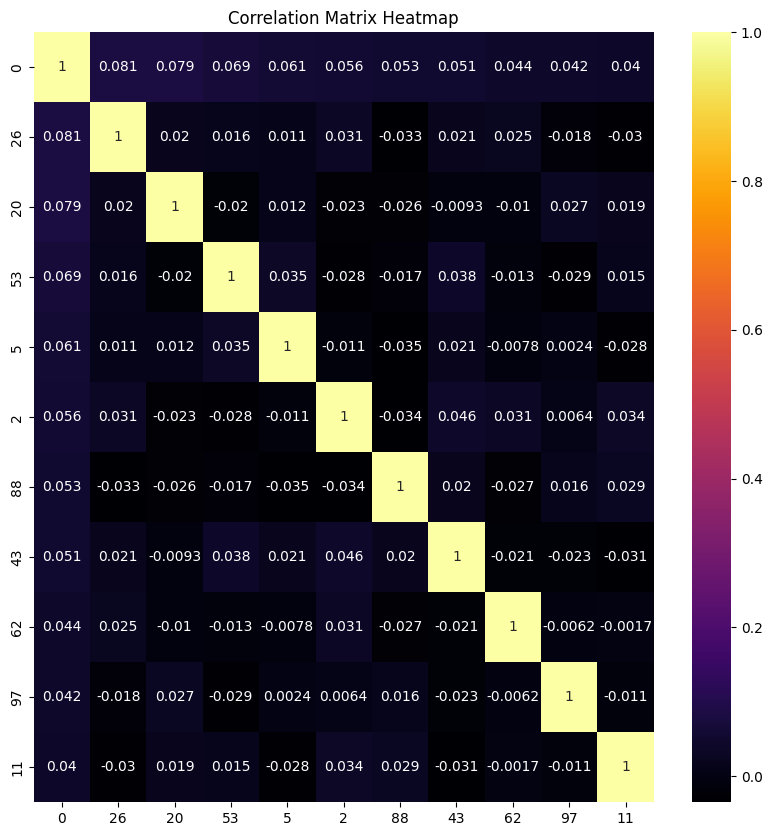

In [11]:
# Visualize it as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='inferno')
plt.title('Correlation Matrix Heatmap')
plt.show()

---

In [12]:
# First classifier: LogisticRegression
# Create and train the Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.927231807951988
Precision: [0.93857965 0.88659794]
Recall: [0.96735905 0.80124224]


In [13]:
# Second classifier: DecisionTree:
# Create and train the Decision Tree classifier:
dtc = DecisionTreeClassifier(max_depth=5, random_state=29)
dtc.fit(X_train, y_train)

# Make predictions on the test data:
y_pred = dtc.predict(X_test)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9392348087021756
Precision: [0.94201521 0.92882562]
Recall: [0.98021761 0.81055901]


In [14]:
# Third classifier: KNN:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7914478619654913
Precision: [0.80720872 0.65714286]
Recall: [0.95252226 0.28571429]


In [15]:
# Fourth classifier: SVM
# Create and train the SVM classifier
svc = SVC(kernel='linear', random_state=29)
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9017254313578394
Precision: [0.93052838 0.80707395]
Recall: [0.94065282 0.77950311]


---
Let's now see how our different classifiers perform on the actual test data, and calculate AUC:

In [16]:
# Reload both our training and validation sets:
traindata = pd.read_csv('train.txt', delim_whitespace=True, header=None)
testdata = pd.read_csv('test.txt', delim_whitespace=True, header=None)

In [17]:
# Separate features and targets from our newly initiated train dataset
X = traindata.iloc[:,:-1]
y = traindata.iloc[:,-1]

In [18]:
# Set our test dataset as Xval (for validation):
Xval = testdata

In [19]:
# First classifier: DecisionTree
# Create and train the Decision Tree classifier:
dtc = DecisionTreeClassifier(max_depth=5, random_state=29)
dtc.fit(X, y)

# Make predictions on the test data:
y_pred_val = dtc.predict(Xval)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y, y_pred_val)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_val, pos_label=1)
print("Precision:", precision)
print("Recall:", recall)

# Compute AUC
auc = roc_auc_score(y, y_pred_val)
print("AUC:", auc)

Accuracy: 0.6134453781512605
Precision: [0.74637681 0.2240566 ]
Recall: [0.73805732 0.23170732]
AUC: 0.4848823209569675


In [20]:
# First classifier: LogisticRegression
# Create and train the Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X, y)

# Make predictions on the test data
y_pred_val = lr.predict(Xval)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y, y_pred_val)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_val, pos_label=1)
print("Precision:", precision)
print("Recall:", recall)

# Compute AUC
auc = roc_auc_score(y, y_pred_val)
print("AUC:", auc)

Accuracy: 0.617046818727491
Precision: [0.74919355 0.23239437]
Recall: [0.73964968 0.24146341]
AUC: 0.49055654808140436


C:\Users\YASHWANTH PINDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Third classifier: KNN:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Make predictions on the test data
y_pred_val = knn.predict(Xval)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y, y_pred_val)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_val, pos_label=1)
print("Precision:", precision)
print("Recall:", recall)

# Compute AUC
auc = roc_auc_score(y, y_pred_val)
print("AUC:", auc)

Accuracy: 0.6620648259303722
Precision: [0.75018051 0.22775801]
Recall: [0.8272293  0.15609756]
AUC: 0.4916634301693335


In [22]:
# Fourth classifier: SVM:
# Create and train the SVM classifier
svc = SVC(kernel='linear', random_state=29)
svc.fit(X, y)

# Make predictions on the test data
y_pred_val = svc.predict(Xval)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y, y_pred_val)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_val, pos_label=1)
print("Precision:", precision)
print("Recall:", recall)

# Compute AUC
auc = roc_auc_score(y, y_pred_val)
print("AUC:", auc)

Accuracy: 0.6224489795918368
Precision: [0.75180723 0.23990499]
Recall: [0.74522293 0.24634146]
AUC: 0.49578219667546997


In [23]:
# Fifth classifier: RandomForestClassifier
# Create and train the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=29)
rfc.fit(X, y)

# Make predictions on the test data
y_pred_val = rfc.predict(Xval)

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y, y_pred_val)
print('Accuracy:', accuracy)

# Compute precision and recall
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_val, pos_label=1)
print("Precision:", precision)
print("Recall:", recall)

# Compute AUC
auc = roc_auc_score(y, y_pred_val)
print("AUC:", auc)


Accuracy: 0.6194477791116446
Precision: [0.74840256 0.2294686 ]
Recall: [0.74601911 0.23170732]
AUC: 0.48886321267671273


We achieve the best accuracy with the KNN classifier:
- Accuracy: 0.6620648259303722
- Precision: [0.75018051 0.22775801]
- Recall: [0.8272293  0.15609756]
- AUC: 0.4916634301693335

In [24]:
# Write our predictions to a text file:
with open('Jerem_predicted_values.txt', 'w') as f:
    for pred in y_pred_val:
        f.write(f'{int(pred)}\n')